<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install asyncpraw yfinance==0.2.54 dotenv vaderSentiment fredapi

In [25]:
#Mount for api sharing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please copy the shared .env file path in the **env_path** for OpenAi API

In [26]:
import os
from dotenv import load_dotenv

# Please copy the shared .env file path
env_path = '/content/drive/MyDrive/DAT_490/.env'
load_dotenv(dotenv_path=env_path)

# API
gpt_api_key = os.getenv("API_KEY")
print("API Key Loaded Successfully")

API Key Loaded Successfully


In [27]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [28]:
#Select the frim for the prediction
firm = "MSFT"

Top 10 Tech Companies in U.S.
- Apple Inc. – $3.69 trillion (AAPL)

- Nvidia Corporation – $3.43 trillion (NVDA)

- Microsoft Corporation – $3.09 trillion (MSFT)

- Amazon.com Inc. – $2.36 trillion (AMZN)

- Alphabet Inc. – $2.26 trillion (GOOGL)

- Meta Platforms Inc. – $1.76 trillion (META)

- Tesla Inc. – $1.14 trillion (TSLA)

- Broadcom Inc. – $1.06 trillion (AVGO)

- Oracle Corporation – $518.32 billion (ORCL)

- Advanced Micro Devices (AMD) – $450 billion (AMD)

In [29]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Microsoft Corporation


In [30]:
#Get the firm name that is commonly used
import re

firm_name = re.sub(r'[^A-Za-z0-9 ]+', '', firm_name).split(' ')[0]
print(firm_name)

Microsoft


# Data Collection

### Stock Price

In [44]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Remove time
df_stock.index = df_stock.index.date

# Remove Index Nme
df_stock.index.name = None

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2020-02-24,160.907827,167.410509,156.553516,163.900208,68311100,0.0,0.0
2020-02-25,167.074895,167.688717,160.792799,161.195633,68073300,0.0,0.0
2020-02-26,162.768570,166.173357,161.329923,163.209747,56206100,0.0,0.0
2020-02-27,156.639876,160.198121,151.518282,151.710098,93174900,0.0,0.0
2020-02-28,146.176136,157.013947,145.782902,155.383469,97012700,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-14,407.790009,408.910004,405.880005,408.429993,22758500,0.0,0.0
2025-02-18,408.000000,410.600006,406.500000,409.640015,21423100,0.0,0.0
2025-02-19,407.880005,415.489990,407.649994,414.769989,24114200,0.0,0.0
2025-02-20,415.290009,419.309998,412.540009,416.130005,23508700,0.0,0.0


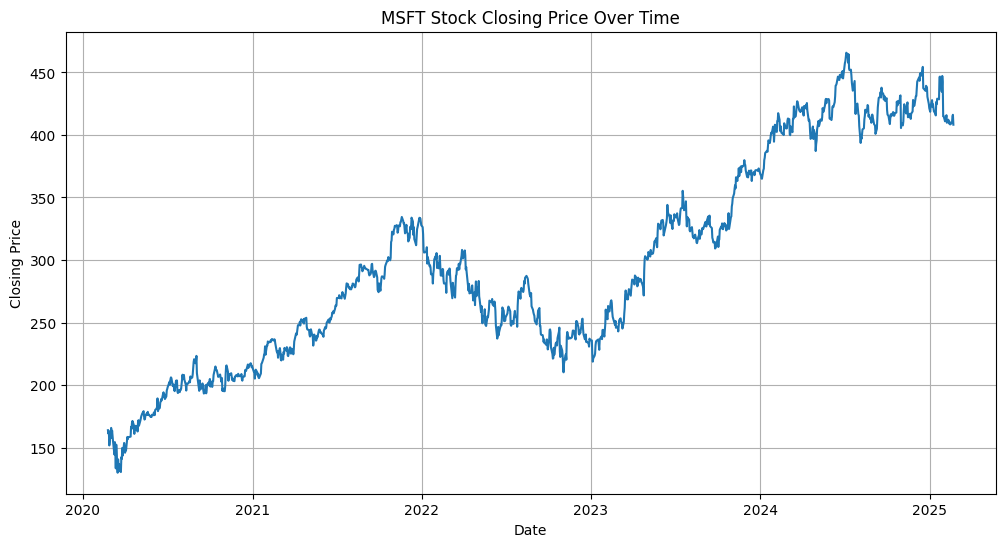

In [32]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [33]:

from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [34]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Unrealized Gain Loss On Investment Securities,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,180160797.164637,0.138266,83831000000.0,1303000000.0,1303000000.0,61271000000.0,11686000000.0,52232000000.0,85134000000.0,73448000000.0,...,-1057000000.0,13000000.0,-150000000.0,-150000000.0,11686000000.0,11686000000.0,11686000000.0,-205000000.0,-205000000.0,61271000000.0
2022-06-30,43754000.0,0.131,99905000000.0,334000000.0,334000000.0,72738000000.0,14460000000.0,62650000000.0,100239000000.0,85779000000.0,...,-509000000.0,101000000.0,-5702000000.0,-5702000000.0,14460000000.0,14460000000.0,14460000000.0,-1000000.0,-1000000.0,72738000000.0
2023-06-30,-2850000.0,0.19,105155000000.0,-15000000.0,-15000000.0,72361000000.0,13861000000.0,65863000000.0,105140000000.0,91279000000.0,...,-303000000.0,30000000.0,-6059000000.0,-6059000000.0,13861000000.0,13861000000.0,13861000000.0,469000000.0,469000000.0,72361000000.0
2024-06-30,-99918000.0,0.182,133558000000.0,-549000000.0,-549000000.0,88136000000.0,22287000000.0,74114000000.0,133009000000.0,110722000000.0,...,-146000000.0,206000000.0,-4738000000.0,-4738000000.0,22287000000.0,22287000000.0,22287000000.0,245000000.0,245000000.0,88136000000.0


In [35]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Total Unusual Items',
 'Total Unusual Items Excluding Goodwill',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Special Income Charges',
 'Write Off',
 'Gain On Sale Of Security',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',


In [36]:
# Feature Selected
relevant_columns = [
    'Net Income', 'EBITDA', 'EBIT', 'Operating Income', 'Gross Profit',
    'Diluted EPS', 'Basic EPS', 'Total Debt', 'Net Debt', 'Total Liabilities Net Minority Interest',
    'Common Stock Equity', 'Total Revenue', 'Operating Revenue', 'Net PPE',
    'Goodwill And Other Intangible Assets', 'Operating Cash Flow', 'Free Cash Flow',
    'Investing Cash Flow', 'Financing Cash Flow', 'Stock Based Compensation',
    'Change In Working Capital', 'Depreciation And Amortization', 'Tax Provision', 'Interest Expense'
]

# Data frame
df_micro = df_micro[relevant_columns].copy()

#drop nan
df_micro.dropna(inplace=True)

df_micro

,Net Income,EBITDA,EBIT,Operating Income,Gross Profit,Diluted EPS,Basic EPS,Total Debt,Net Debt,Total Liabilities Net Minority Interest,...,Goodwill And Other Intangible Assets,Operating Cash Flow,Free Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock Based Compensation,Change In Working Capital,Depreciation And Amortization,Tax Provision,Interest Expense
2021-06-30,61271000000.0,85134000000.0,73448000000.0,69916000000.0,115856000000.0,8.05,8.12,67775000000.0,43922000000.0,191791000000.0,...,57511000000.0,76740000000.0,56118000000.0,-27577000000.0,-48486000000.0,6118000000.0,-936000000.0,11686000000.0,9831000000.0,2346000000.0
2022-06-30,72738000000.0,100239000000.0,85779000000.0,83383000000.0,135620000000.0,9.65,9.7,61270000000.0,35850000000.0,198298000000.0,...,78822000000.0,89035000000.0,65149000000.0,-30311000000.0,-58876000000.0,7502000000.0,446000000.0,14460000000.0,10978000000.0,2063000000.0
2023-06-30,72361000000.0,105140000000.0,91279000000.0,88523000000.0,146052000000.0,9.68,9.72,59965000000.0,12533000000.0,205753000000.0,...,77252000000.0,87582000000.0,59475000000.0,-22680000000.0,-43935000000.0,9611000000.0,-2388000000.0,13861000000.0,16950000000.0,1968000000.0
2024-06-30,88136000000.0,133009000000.0,110722000000.0,109433000000.0,171008000000.0,11.8,11.86,67127000000.0,33315000000.0,243686000000.0,...,146817000000.0,118548000000.0,74071000000.0,-96970000000.0,-37757000000.0,10734000000.0,1824000000.0,22287000000.0,19651000000.0,2935000000.0


### Sentiment Analysis

##### Articles

In [57]:
# Data Imporing
df_articles = pd.read_csv(f"/content/drive/MyDrive/DAT_490/{firm}_5year_news_dataset.csv")
df_articles = df_articles[['time', 'articles_sentiment']]
df_articles.set_index('time', inplace=True)

# convert time to datetime format
df_articles.index = pd.to_datetime(df_articles.index, utc=True)

# Remove time
df_articles.index = df_articles.index.date

# Remove index name
df_articles.index.name = None

# One-Hot Encoding
df_articles = pd.get_dummies(df_articles, columns=['sentiment'])

df_articles

,sentiment_Negative,sentiment_Neutral,sentiment_Positive
2025-02-20,False,False,True
2025-02-20,False,True,False
2025-02-20,False,True,False
2025-02-20,False,False,True
2025-02-20,False,False,True
...,...,...,...
2020-03-18,False,True,False
2020-03-18,False,False,True
2020-03-18,False,True,False
2020-03-18,False,False,True


##### Reddit web scrapping

In [37]:
import openai
import ast
import re
import time

# Initialize OpenAI client
client = openai.OpenAI(api_key=gpt_api_key)

# Function to get firm keywords
def get_firm_keywords(firm_name):
    while True:
        try:
            # Request completion from OpenAI
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {"role": "system", "content": f"You strictly and carefully follow the instruction"},
                    {"role": "user", "content": f"""Give me eight most profitable or representative products
                    and one representative leader about the {firm_name} as a string list.
                    Prioritize the words that can influce the firm's stock price.
                    Do not include any other words or sentences. Just give me list like ["a", "b", "c"].
                    It should be 1-2 words but add "{firm_name}" to the word when the word can be confused with other common word.
                    For example, words like "Windows" and "Surface" should be changed to "Microsoft Windows" and "Microsoft Surface".
                    Do not include special characters. The keywords should be specific for the firm."""}
                ],
                max_tokens=100
            )
            output = response.choices[0].message.content
            # Convert response to list
            keywords = ast.literal_eval(response.choices[0].message.content)

            # Add firm name to the list and clean keywords
            keywords.append(firm_name)
            keywords = [re.sub(r"[^\w\s]", '', keyword.replace('_', ' ')).replace('-', ' ') for keyword in keywords]

            return keywords

        except (openai.OpenAIError, ValueError, SyntaxError) as e:
            print(f"An error occurred: {e}. Retrying...")
            time.sleep(1)  # Wait before retrying

# Get the keywords
keywords = get_firm_keywords(firm_name)
print(keywords)

['Microsoft Windows', 'Microsoft Office', 'Microsoft Azure', 'Microsoft Surface', 'Microsoft Xbox', 'Microsoft Teams', 'Microsoft Dynamics', 'Microsoft LinkedIn', 'Satya Nadella', 'Microsoft']


In [59]:
from datetime import datetime
import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error


nest_asyncio.apply()  # Prevent async loop error

# API
async def fetch_reddit(firm_name):
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit("worldnews")  # Searching from r/worldnews

    data = []

    # keyword search
    async for post in subreddit.search(firm_name, limit=500, sort='new', time_filter='all'):
        data.append({
            "Title": post.title,
            "Score": post.score,
            "Date Posted": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
        })

    await reddit.close()

    # DataFrame
    df = pd.DataFrame(data)
    return df

# df_reddt = await fetch_reddit(firm_name) #For Single Keyword
# df_reddt

# loop for keywords
dataframes = []
for keyword in keywords:
    df = await fetch_reddit(keyword)
    dataframes.append(df)
df_reddit = pd.concat(dataframes, ignore_index=True)

#Removing Duplicates
df_reddit.drop_duplicates(inplace=True)
#Sorting
df_reddit = df_reddit.sort_values(by='Date Posted', ascending=False).reset_index(drop=True)

df_reddit['Date Posted'] = pd.to_datetime(df_reddit['Date Posted'])

# Date Posted column to index
df_reddit.set_index('Date Posted', inplace=True)

df_reddit.index.name = None
df_reddit

,Title,Score
2025-02-19,Microsoft creates chip it says shows quantum c...,142
2025-02-19,Microsoft Announces Quantum Computing Breakthr...,111
2025-01-17,New Star Blizzard spear-phishing campaign targ...,45
2025-01-17,"Russian hackers target WhatsApp in new tactic,...",275
2024-11-25,"Microsoft, Outlook and Teams Restoration Time ...",96
...,...,...
2009-01-19,Microsoft Windows virus that has infected 9mil...,0
2008-09-01,"Microsoft to cut Xbox 360 price in Japan, woul...",0
2008-08-24,Low cost Microsoft Office 2007 for students,1
2008-07-30,Microsoft Prepares for End of Windows With Mid...,9


##### Sentiment Analysis (Text Quantification)

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df_reddit['Sentiment_Score'] = df_reddit['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_reddit.drop("Title", axis = 1, inplace = True)

df_reddit.columns = ['reddit_vote_score', 'reddit_sentiment_score']
df_reddit

,reddit_post_score,reddit_sentiment_score
2025-02-19,142,0.2732
2025-02-19,111,0.0258
2025-01-17,45,0.3400
2025-01-17,275,-0.1027
2024-11-25,96,-0.2500
...,...,...
2009-01-19,0,-0.6705
2008-09-01,0,-0.2732
2008-08-24,1,-0.2732
2008-07-30,9,0.0000


##### Data Merging (Sentiment Analysis)

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation